# HW_4 
#### Amirhossein Dezhdar 9923026
#### Zeinab Sadat Mirhashemi 9923125

# import moudel

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import os
print(os.listdir("../hw4"))

# Any results you write to the current directory are saved as output.

['Mall_Customers.csv', 'hw4.ipynb']


# import csv file 

In [49]:
df = pd.read_csv('../hw4/Mall_Customers.csv')


# Read csv and plot info

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [51]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [52]:
df.shape

(200, 5)

In [53]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [54]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [55]:
df.rename(columns={"Annual Income (k$)":"AIncome","Spending Score (1-100)":"Score"},inplace=True)

In [56]:
df.head()

,Gender,Age,AIncome,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


`Plot age frequncy`

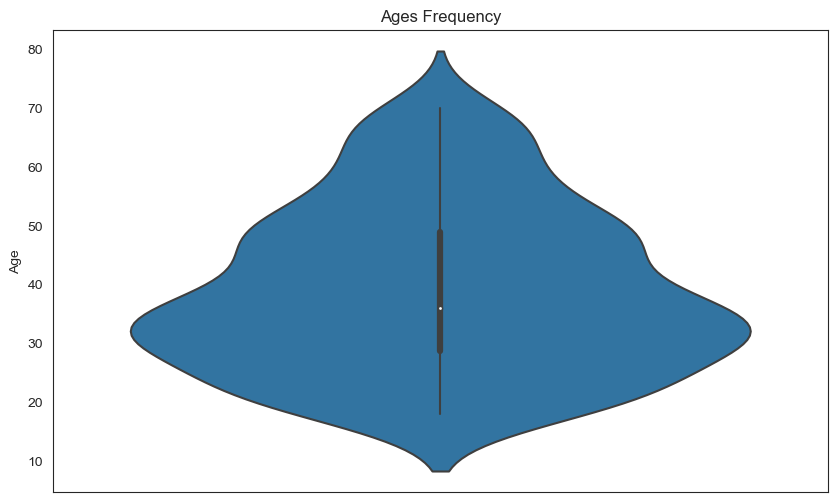

In [57]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

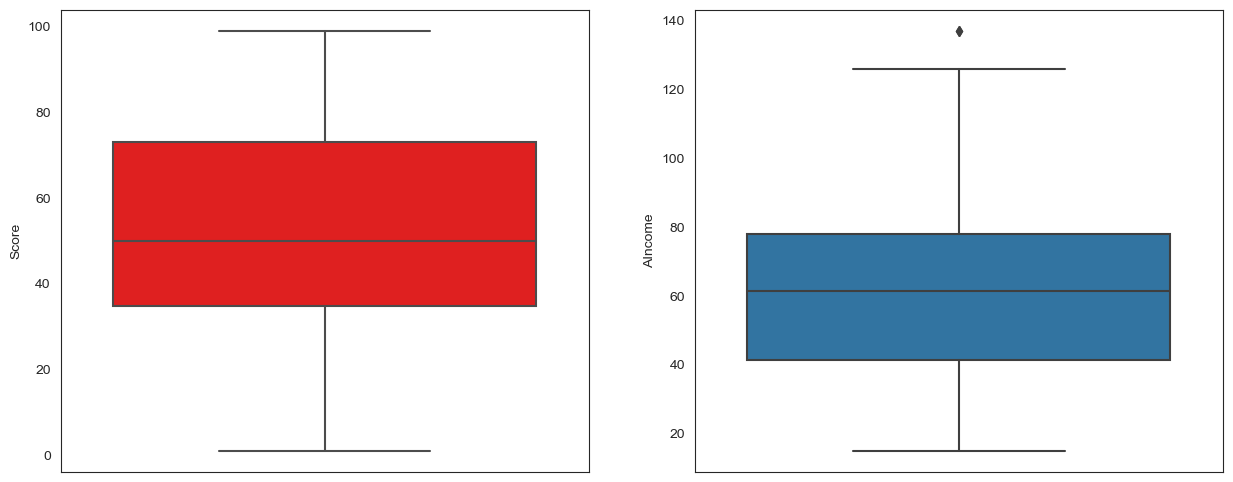

In [58]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Score"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["AIncome"])
plt.show()

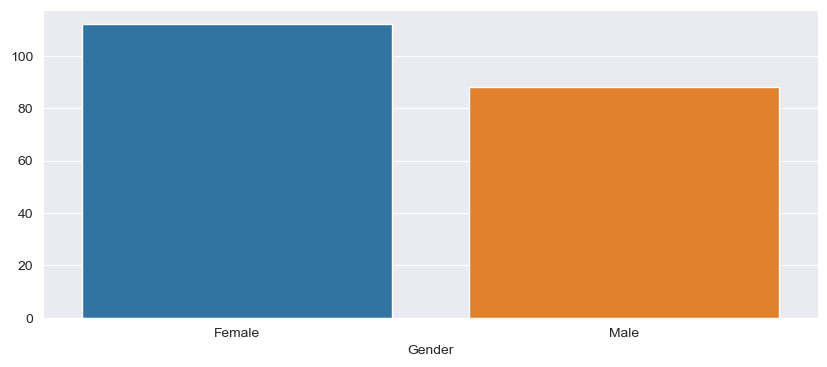

In [59]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

Text(0.5, 0, 'Age')

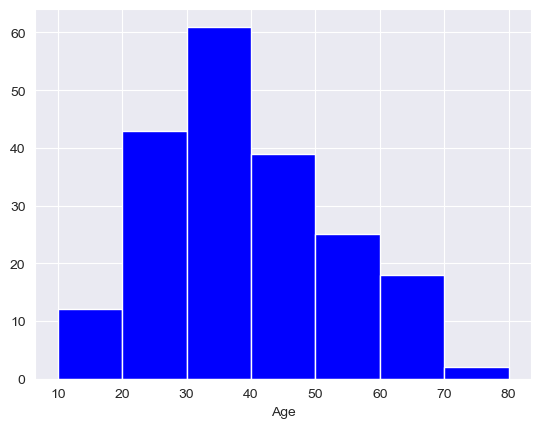

In [60]:
plt.hist(data=df,x='Age',bins=[10,20,30,40,50,60,70,80],color='Blue')
plt.xlabel('Age')

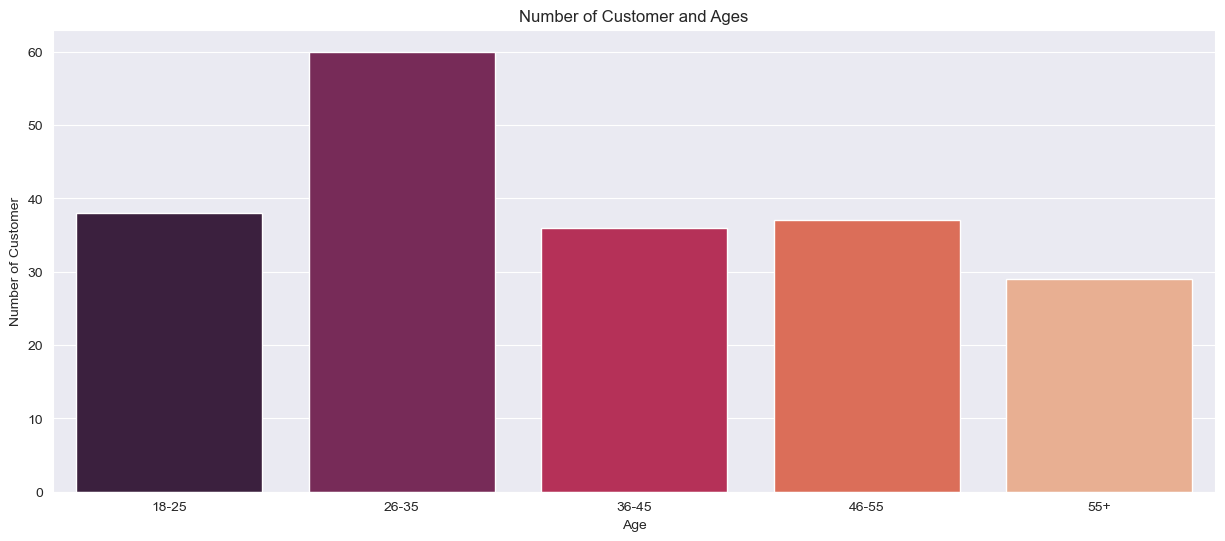

In [61]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

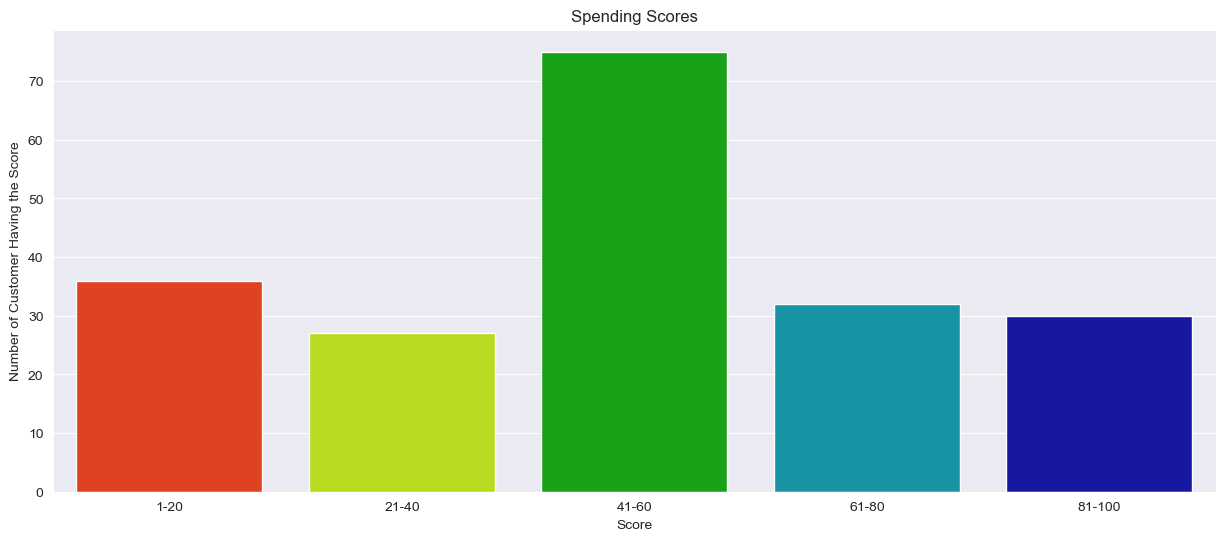

In [62]:
ss1_20 = df["Score"][(df["Score"] >= 1) & (df["Score"] <= 20)]
ss21_40 = df["Score"][(df["Score"] >= 21) & (df["Score"] <= 40)]
ss41_60 = df["Score"][(df["Score"] >= 41) & (df["Score"] <= 60)]
ss61_80 = df["Score"][(df["Score"] >= 61) & (df["Score"] <= 80)]
ss81_100 = df["Score"][(df["Score"] >= 81) & (df["Score"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()



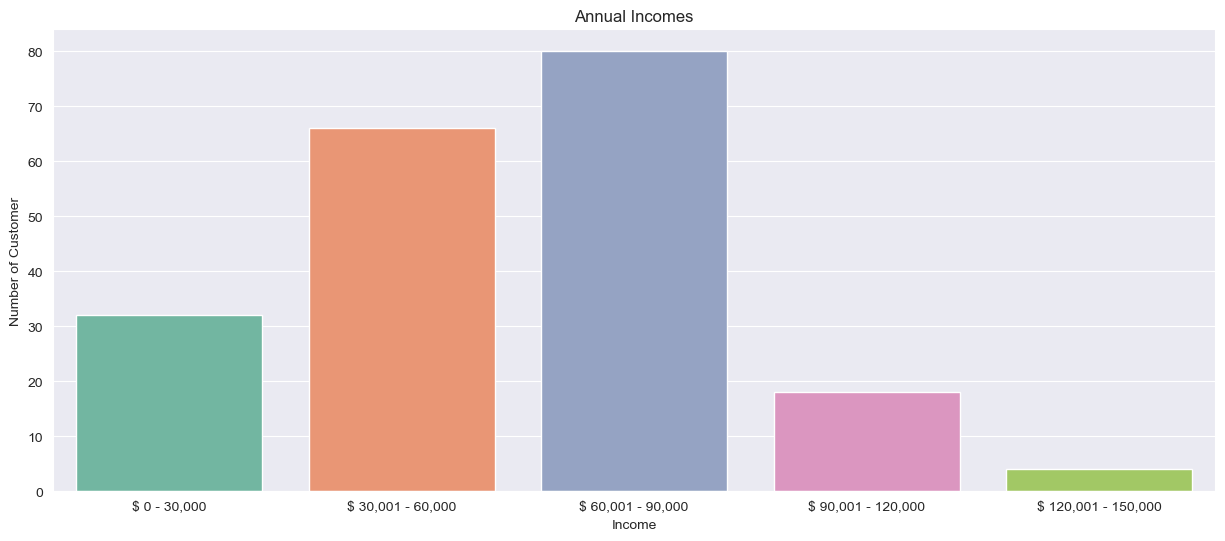

In [63]:
ai0_30 = df["AIncome"][(df["AIncome"] >= 0) & (df["AIncome"] <= 30)]
ai31_60 = df["AIncome"][(df["AIncome"] >= 31) & (df["AIncome"] <= 60)]
ai61_90 = df["AIncome"][(df["AIncome"] >= 61) & (df["AIncome"] <= 90)]
ai91_120 = df["AIncome"][(df["AIncome"] >= 91) & (df["AIncome"] <= 120)]
ai121_150 = df["AIncome"][(df["AIncome"] >= 121) & (df["AIncome"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# 2D k-Mean(2 Paramater)

In [64]:
df = pd.read_csv('../hw4/Mall_Customers.csv')

In [65]:
df.rename(columns={"Annual Income (k$)":"AIncome","Spending Score (1-100)":"Score"},inplace=True)

In [66]:
df.head()

,CustomerID,Gender,Age,AIncome,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
X = df.drop(columns=['CustomerID', 'Gender', 'AIncome'])
X.head()

,Age,Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [68]:
from sklearn.cluster import KMeans

In [69]:
kmeans = KMeans(n_clusters=5).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

c:\Users\amirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\amirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Spending Score')

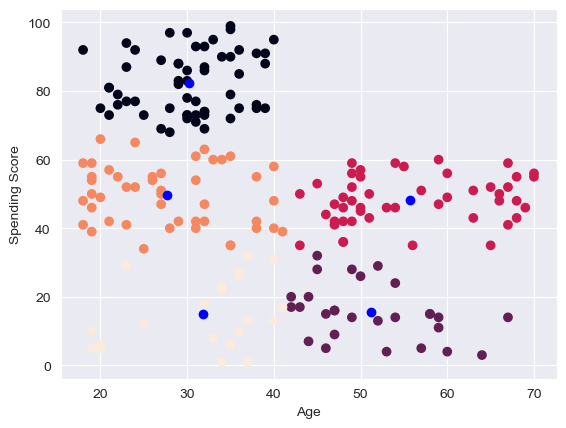

In [70]:
x=df['Age']
y=df['Score']
plt.scatter(x,y,c=labels)
plt.scatter(centroids[:,0],centroids[:,1],color='Blue')
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [71]:
X2 = df.drop(columns=['CustomerID','Gender','Age'])
X2.head()

,AIncome,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [72]:
kmeans2 = KMeans(n_clusters=5).fit(X2)
labels2 = kmeans2.labels_
centroid2 = kmeans2.cluster_centers_

c:\Users\amirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\amirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Spending Score')

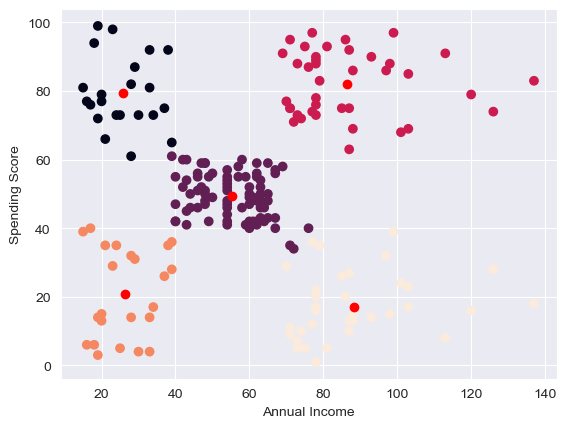

In [73]:
x2 = df['AIncome']
y2 = df['Score']

plt.scatter(x2,y2,c=labels2)
plt.scatter(centroid2[:,0],centroid2[:,1],color='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# 3D K-Mean(3 Paramater)

In [83]:
df.head()

,CustomerID,Gender,Age,AIncome,Score,label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


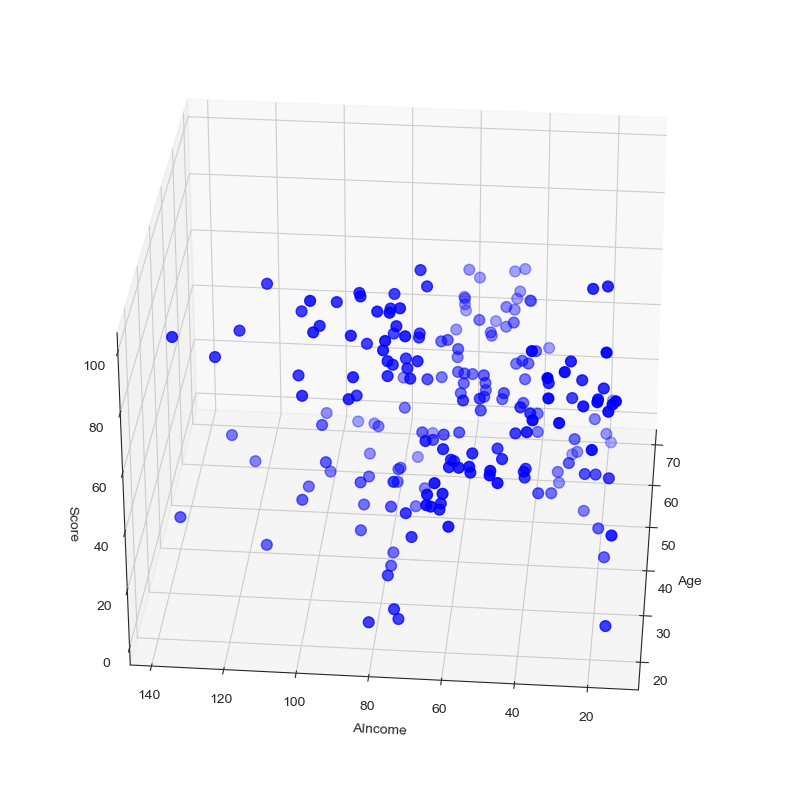

In [84]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["AIncome"], df["Score"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("AIncome")
ax.set_zlabel('Score')
plt.show()

c:\Users\amirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\amirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\amirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\amirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

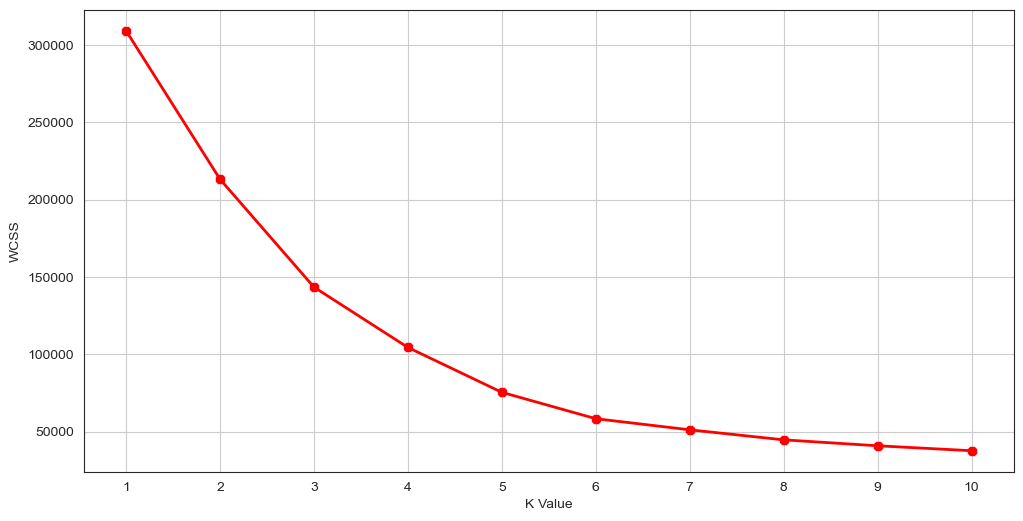

In [86]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,2:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

c:\Users\amirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\amirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


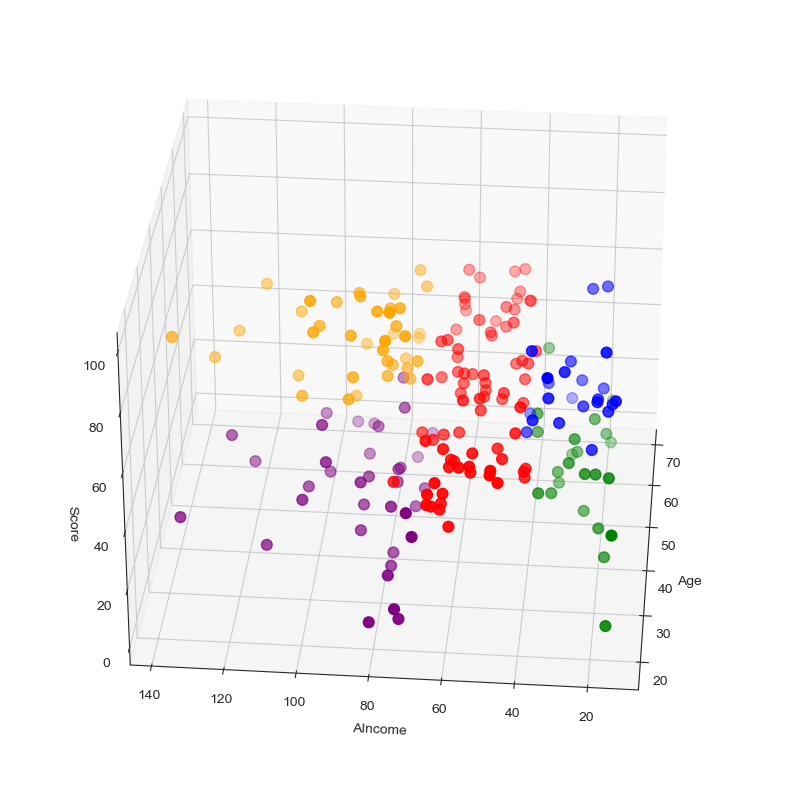

In [81]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,2:])

df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["AIncome"][df.label == 0], df["Score"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["AIncome"][df.label == 1], df["Score"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["AIncome"][df.label == 2], df["Score"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["AIncome"][df.label == 3], df["Score"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["AIncome"][df.label == 4], df["Score"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("AIncome")
ax.set_zlabel('Score')
plt.show()